In [1]:
#!/usr/bin/python
from __future__ import absolute_import

import numpy as np
#from tensorflow import keras
import pickle
import argparse
import copy
import random
import time
import torch

from shapley.apps import Label, Summarization
from shapley.loader import FashionMnist, MNIST, Flower
from shapley.measures import KNN_Shapley, KNN_LOO, G_Shapley, LOO, TMC_Shapley, FastWeightedShapley
from shapley.utils.plotter import LabelPlotter, PoisoningPlotter

%matplotlib inline
# import global vars
from init import *

2023-06-03 14:14:36.278030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 14:14:37.324231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term
Loaded Global Variables!


## Data Summarization

In [2]:
num_train = 60000
num_test = 10000
datasource = "fmnist"
#loader = MNIST(num_train=num, one_hot=False, shuffle=True, by_label=True)
loader = FashionMnist(num_train=num_train,num_test = num_test, all_classes=True, seed = seed)
# loader = Flower(num_train=num)
X_data, y_data, X_test_data, y_test_data = loader.prepare_data()
print(X_test_data.shape, X_data.shape)

(10000, 784) (60000, 784)


In [3]:
start = time.time()
model_family = "resnet18"
model_checkpoint_dir = f"./checkpoints/{datasource}"
measure_fast_weighted_shapley = FastWeightedShapley(K = 5, model_checkpoint_dir=model_checkpoint_dir)

app = Summarization(X_data, y_data, X_test_data, y_test_data, model_family=model_family, model_checkpoint_dir=model_checkpoint_dir)

res = app.run(measure_fast_weighted_shapley)
res_fwshapley = res #np.zeros(len(res))
# for i in range(len(res)): res_fwshapley[i] = res[i][0]
print('Fast Weighted Shapley compute time: ',time.time()-start)

/home/sidtandon/Sid/GitRepo/fast-data-shapley/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sidtandon/Sid/GitRepo/fast-data-shapley/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading existing resnet18 model weights
Getting data importance for all samples
Loaded model acc 91.21 on test set
Extracting features from base model
Loading existing explainer model weights
Time taken: 64.01123881340027
Getting prediction accuracy when features are removed eith hihget to lowes tor lowest ot highest


/home/sidtandon/Sid/GitRepo/fast-data-shapley/.venv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Train Loss: 0.0061 Acc: 0.9998
Val Loss: 0.4740 Acc: 0.9047
60000 0.9047000000000001


/home/sidtandon/Sid/GitRepo/fast-data-shapley/.venv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Train Loss: 0.4807 Acc: 0.9038
Val Loss: 1439.0819 Acc: 0.1041
48000 0.1041
Train Loss: 0.3222 Acc: 0.9381
Val Loss: 232.1935 Acc: 0.2955
36000 0.29550000000000004
Train Loss: 0.3800 Acc: 0.8961
Val Loss: 192.2022 Acc: 0.2732
24000 0.2732
Train Loss: 0.9118 Acc: 0.5477
Val Loss: 35.7169 Acc: 0.1035
12000 0.10350000000000001
Summarization  acc: 0 [90.47, 10.41, 29.550000000000004, 27.32, 10.350000000000001]


IndexError: invalid index to scalar variable.

In [7]:
res

[90.47, 10.41, 29.550000000000004, 27.32, 10.350000000000001]

In [5]:
app = Summarization(X_data, y_data, X_test_data, y_test_data, model_family='resnet18', model_checkpoint_dir=model_checkpoint_dir)
measure_KNN = KNN_Shapley(K=5)
start = time.time()
res_knn = app.run(measure_KNN)
print('KNN Shapley compute time: ',time.time()-start)

# start = time.time()
# res_knnloo = app.run(measure_KNNLOO)
# print('KNN LOO compute time: ',time.time()-start)

# start = time.time()
# res_gshap = app.run(measure_gshap)
# print('GShapley compute time: ',time.time()-start)

# start = time.time()
# res_tmc = app.run(measure_tmc)
# print('TMC Shapley compute time: ',time.time()-start)

# start = time.time()
# res_loo = app.run(measure_LOO)
# print('LOO compute time: ',time.time()-start)


Loading existing resnet18 model weights
Loaded model acc 38.3 on test set
KNN Shapley compute time:  366.13553833961487


In [4]:
res_fwshapley[:100]

array([0.02511933, 0.02038963, 0.02141481, 0.02138657, 0.02136892,
       0.01925422, 0.02140827, 0.0173497 , 0.01982178, 0.01913885,
       0.02592534, 0.02052562, 0.01922506, 0.01891783, 0.02546203,
       0.01736983, 0.0214267 , 0.02062047, 0.01822797, 0.02065098,
       0.0214463 , 0.01733048, 0.02083292, 0.02027474, 0.01915785,
       0.02170163, 0.02046225, 0.02039086, 0.02556983, 0.01685934,
       0.01999613, 0.01905878, 0.02172768, 0.01738202, 0.02054668,
       0.01900937, 0.02137403, 0.01916756, 0.01885345, 0.0184683 ,
       0.02464879, 0.02147147, 0.02559709, 0.01685617, 0.01724303,
       0.01745463, 0.02616336, 0.02086637, 0.01737862, 0.02077235,
       0.02157969, 0.02094955, 0.02167531, 0.02144125, 0.02139601,
       0.02165523, 0.01688799, 0.02162298, 0.02656654, 0.02546935,
       0.02169851, 0.02134247, 0.02633736, 0.02072369, 0.02634321,
       0.02139562, 0.02419764, 0.02000855, 0.01988988, 0.02525633,
       0.02165437, 0.01679973, 0.02076027, 0.02046808, 0.02150

(array([ 6908.,  2039., 12141., 14694., 18051.,   135.,   226.,  1782.,
         3317.,   707.]),
 array([0.01672232, 0.01780373, 0.01888515, 0.01996657, 0.02104799,
        0.0221294 , 0.02321082, 0.02429224, 0.02537366, 0.02645507,
        0.02753649]),
 <BarContainer object of 10 artists>)

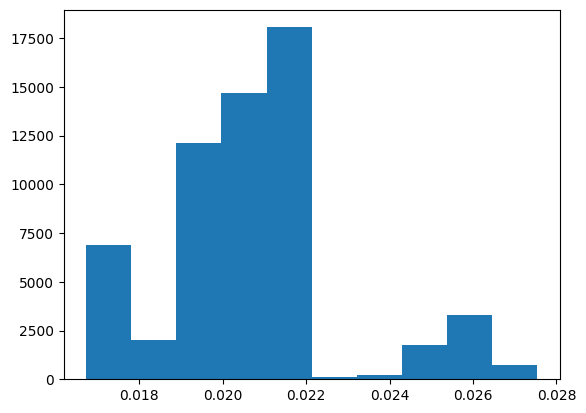

In [5]:
import matplotlib.pyplot as plt
plt.hist(res_fwshapley)

In [13]:
indexes = np.argsort(-res_fwshapley)

In [14]:
res_fwshapley[indexes[:10]]

array([0.02753649, 0.0274868 , 0.02747286, 0.02741732, 0.02737537,
       0.02737295, 0.02737186, 0.02730081, 0.02729676, 0.02726847])

(array([501.,  19.,   7.,   8.,  10.,  18.,  29.,  48., 101.,  43.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

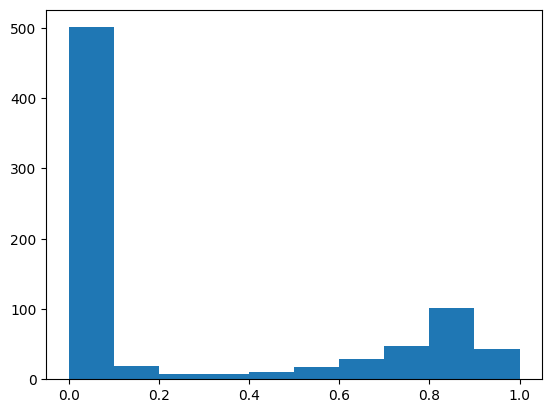

In [25]:
plt.hist(inst_x.reshape(-1))

### Plot high importance images as per weighted shap

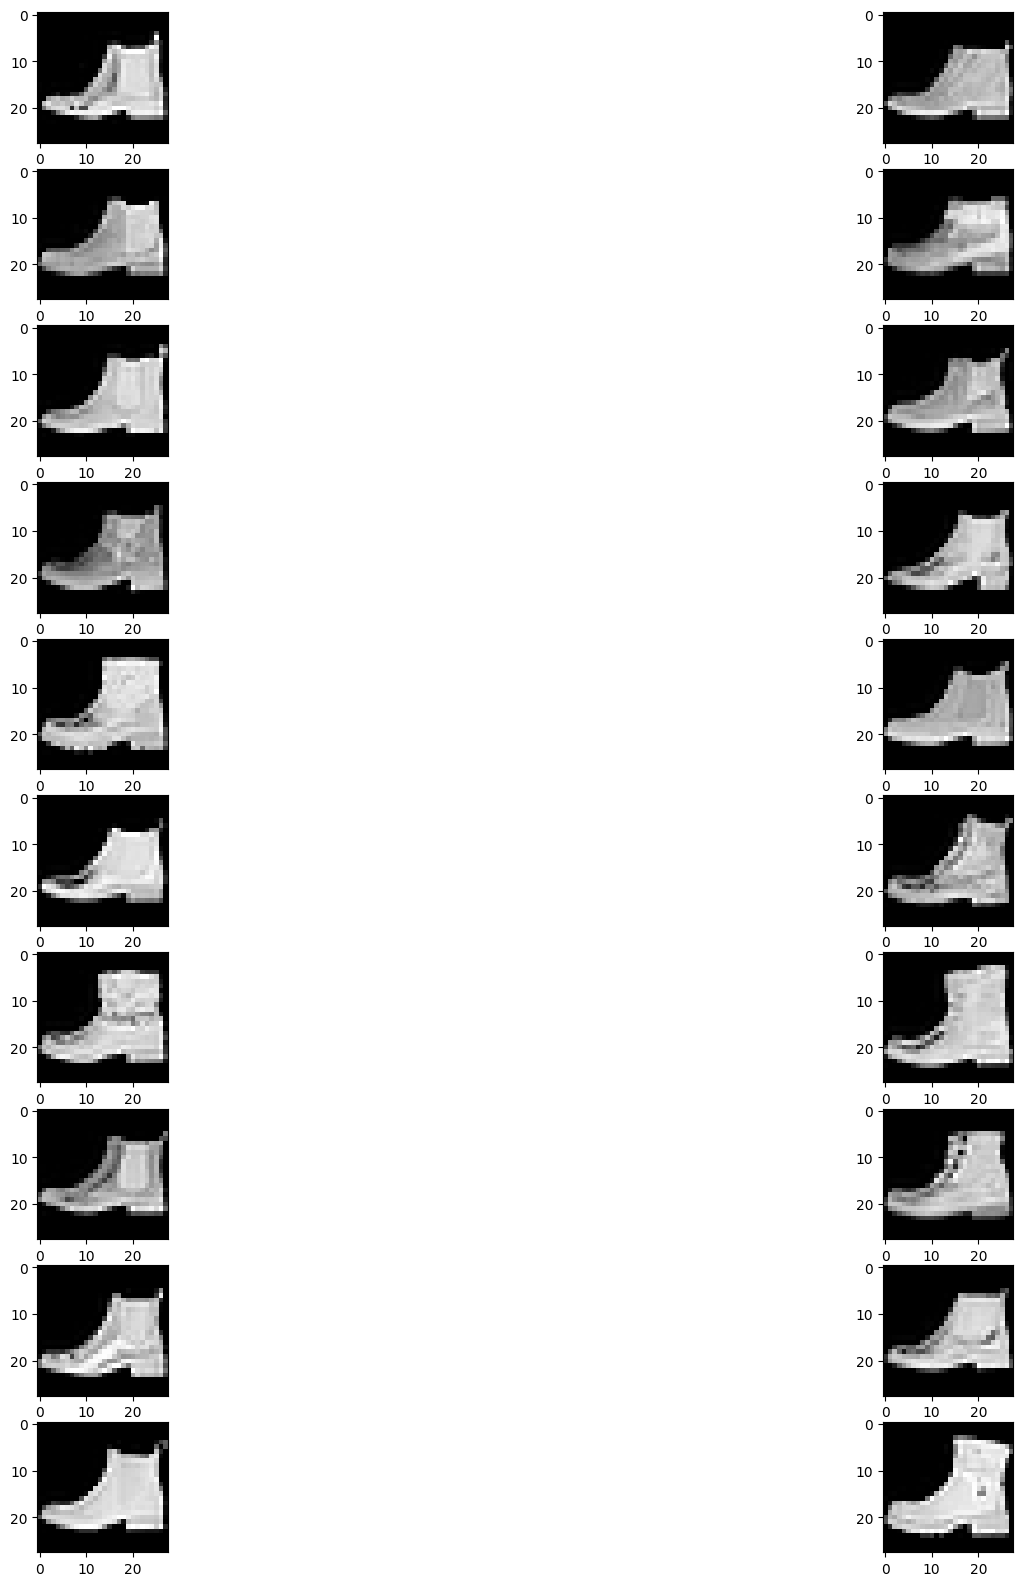

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image

indexes = np.argsort(-res_fwshapley)

plt.figure(figsize=(20, 20))


for i, index in enumerate(indexes[:20]):
    inst_x = X_data[index]
    inst_x = inst_x.reshape(28, 28)
    # inst_x = Image.fromarray(np.uint8(inst_x))
    plt.subplot(10, 2, i+1)
    plt.imshow(inst_x, cmap='gray')
    inst_y = y_data[index]


### Plot low importance images as per weighted shap

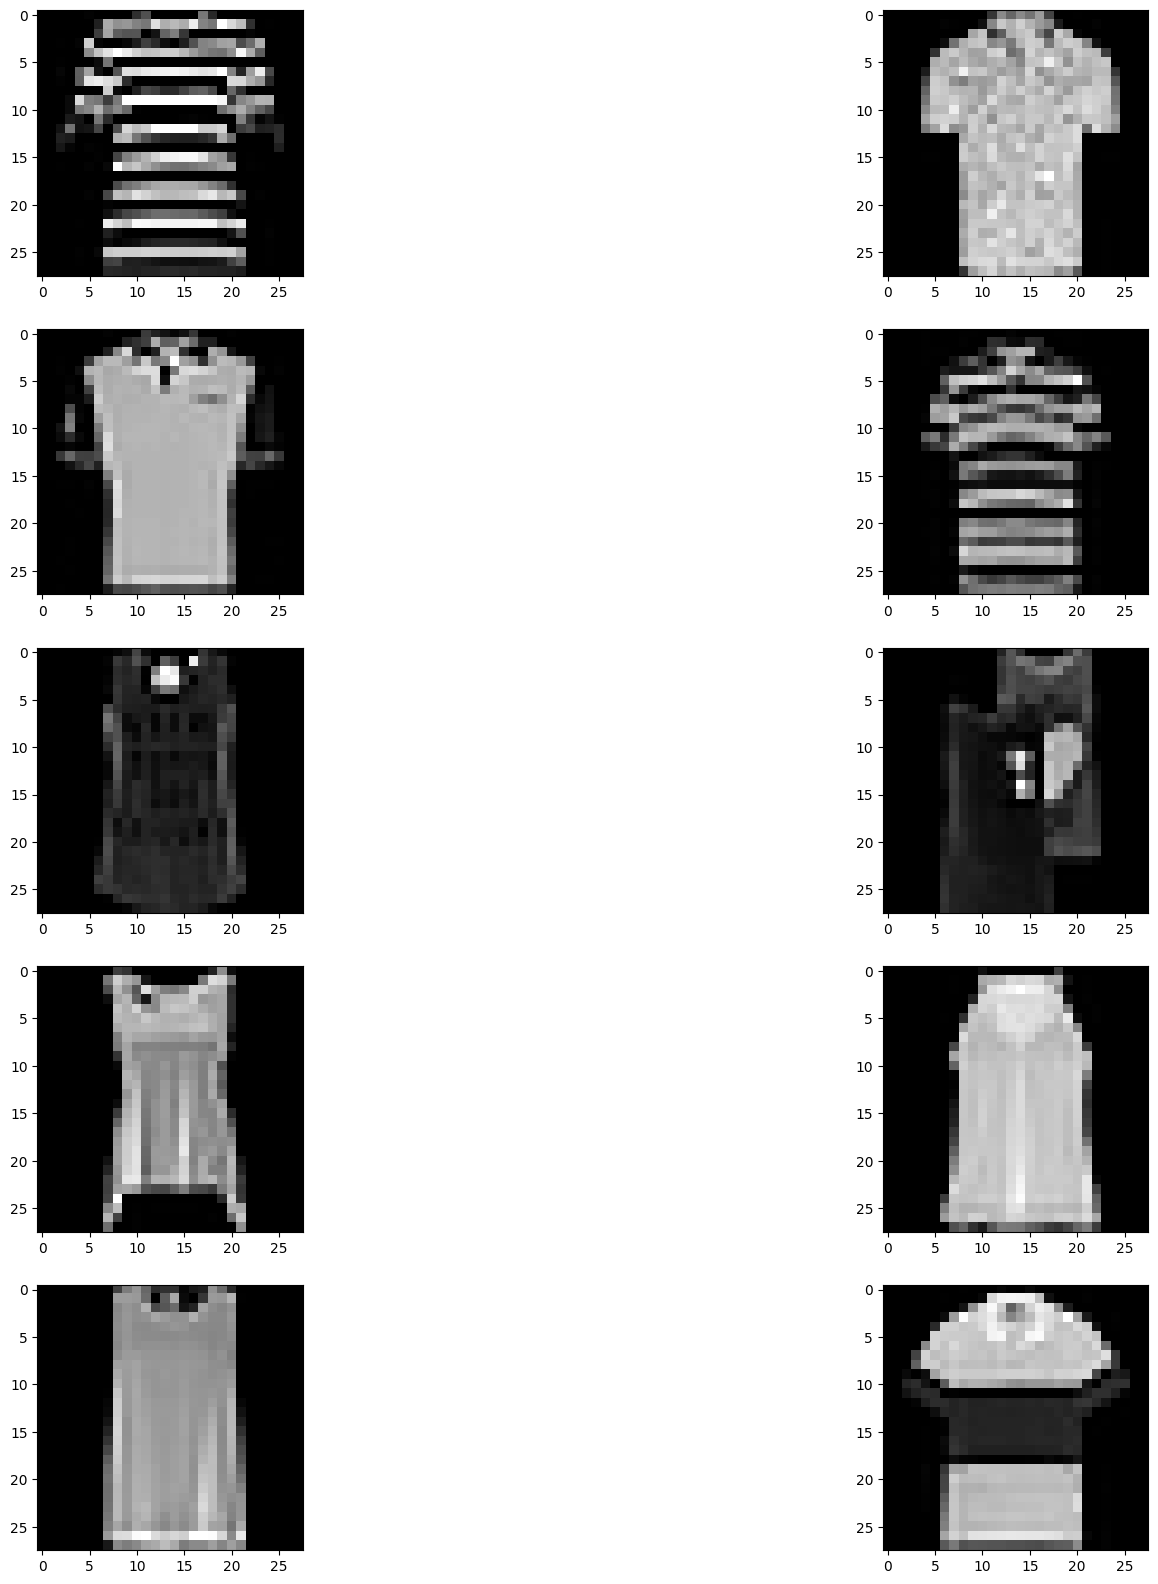

In [37]:
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image

indexes = np.argsort(res_fwshapley)
plt.figure(figsize=(20, 20))
for i, index in enumerate(indexes[:10]):
    inst_x = X_data[index]
    inst_x = inst_x.reshape(28, 28)
    # inst_x = Image.fromarray(np.uint8(inst_x))
    plt.subplot(5, 2, i+1)
    plt.imshow(inst_x, cmap='gray')
    inst_y = y_data[index]


##### visualize

name: FW-Shapley  ,cnt:  6000  ,total:  6000


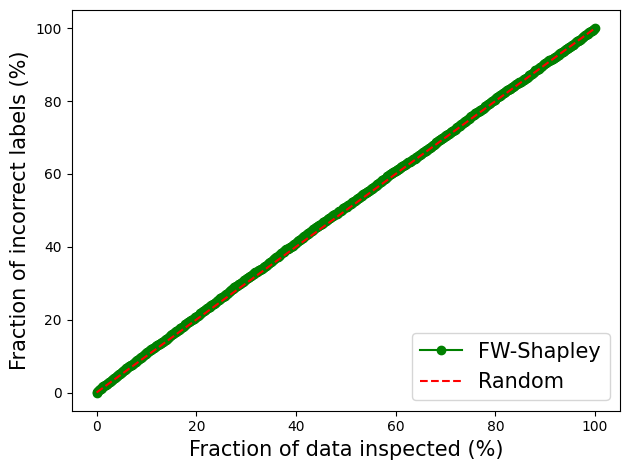

In [7]:
LabelPlotter(app, #('KNN-Shapley',res_knn),
                 ('FW-Shapley', res_fwshapley)).plot()